In [1]:
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile, os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! pip install --upgrade kaggle
! kaggle datasets download -d uciml/iris

Saving kaggle.json to kaggle.json
Requirement already up-to-date: kaggle in /usr/local/lib/python3.6/dist-packages (1.5.9)
  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 6.85MB/s]


In [3]:
local_zip = '/content/iris.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
iris = pd.read_csv('/tmp/Iris.csv')
print(iris.head())
print(iris.info())
print('Ukuran Data',iris.shape)
print(iris.describe())
print(iris.isnull().sum())
print(iris['Species'].unique())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
Ukuran Data (15

In [5]:
print('Jumlah data Kosong:\n',iris.isnull().sum())
print('Jumlah Kategori Species',iris['Species'].unique())

Jumlah data Kosong:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64
Jumlah Kategori Species ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [6]:
iris_data = iris.drop(columns=['Id','Species'])
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


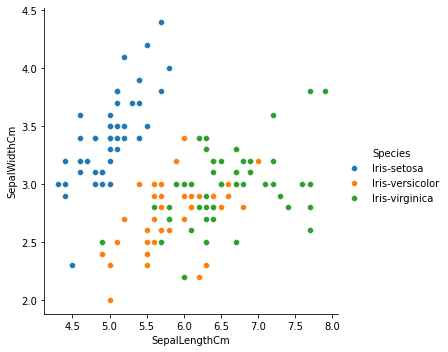

In [7]:
g = sns.FacetGrid(iris,height=5,hue="Species")
g.map(sns.scatterplot,"SepalLengthCm","SepalWidthCm")
g.add_legend()

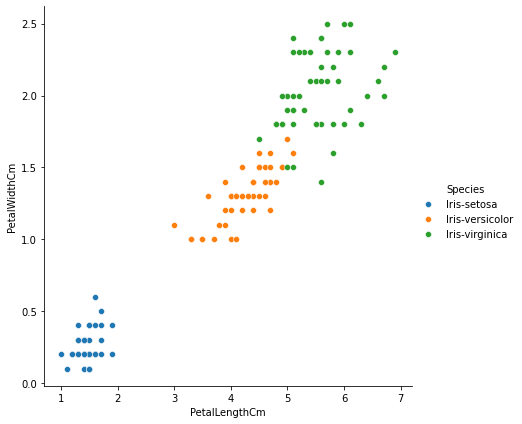

In [8]:
g = sns.FacetGrid(iris,height=6,hue="Species")
g.map(sns.scatterplot,"PetalLengthCm","PetalWidthCm")
g.add_legend()


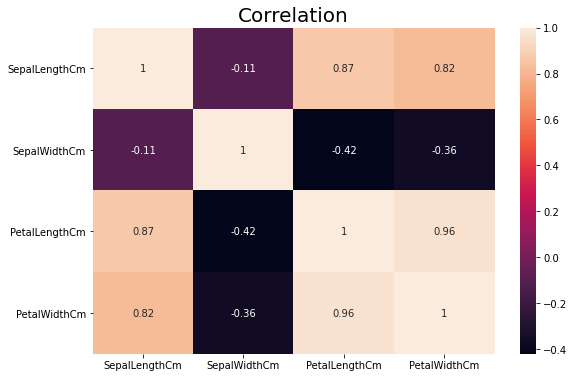

In [9]:
f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(iris_data.corr(),annot=True,ax=ax,)
plt.yticks(rotation=360)
plt.title("Correlation",fontsize=20)
plt.show()

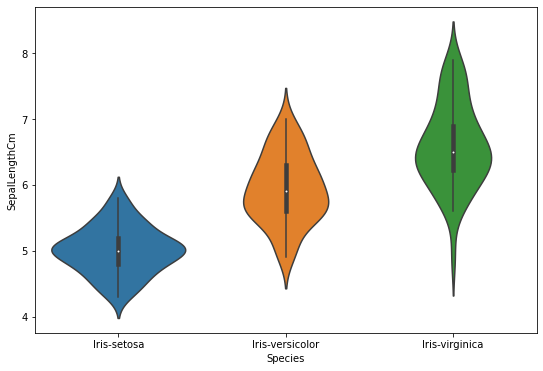

In [10]:
f, ax = plt.subplots(figsize=(9,6))
sns.violinplot(data=iris,x='Species',y='SepalLengthCm',ax = ax)
plt.show()

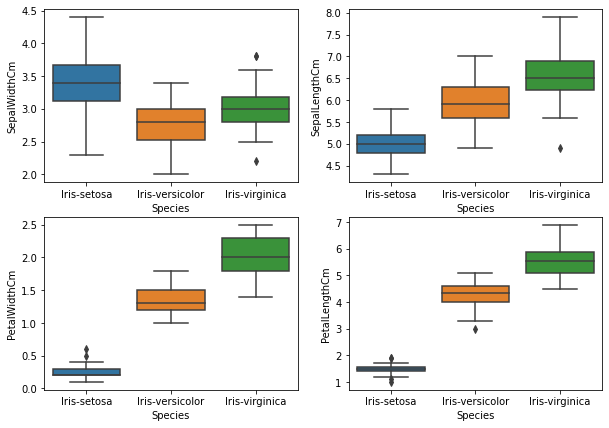

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(10, 7))
sns.boxplot(ax=axes[0,0],data=iris,x='Species',y='SepalWidthCm')
sns.boxplot(ax=axes[0,1],data=iris,x='Species',y='SepalLengthCm')
sns.boxplot(ax=axes[1,0],data=iris,x='Species',y='PetalWidthCm')
sns.boxplot(ax=axes[1,1],data=iris,x='Species',y='PetalLengthCm')

In [12]:
X = iris.drop(['Id','Species'],axis=1)
y = iris['Species']
print('Jumlah Baris dan kolom pada X:', X.shape)
print('Jumlah Baris dan Kolom pada y:',y.shape)

Jumlah Baris dan kolom pada X: (150, 4)
Jumlah Baris dan Kolom pada y: (150,)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 24)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

(105, 4)
(45, 4)
(105,)
(45,)
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
141            6.9           3.1            5.1           2.3
88             5.6           3.0            4.1           1.3
37             4.9           3.1            1.5           0.1
40             5.0           3.5            1.3           0.3
25             5.0           3.0            1.6           0.2
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
107            7.3           2.9            6.3           1.8
114            5.8           2.8            5.1           2.4
57             4.9           2.4            3.3           1.0
59             5.2           2.7            3.9           1.4
105            7.6           3.0            6.6           2.1
141     Iris-virginica
88     Iris-versicolor
37         Iris-setosa
40         Iris-setosa
25         Iris-setosa
Name: Species, dtype: object
107     Iris-virginica
114     Iris-virginica
57     Iris-versicolor
59     Iris-v

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


The accuracy of the Logistic Regression is 0.9777777777777777

Confusion matrix:


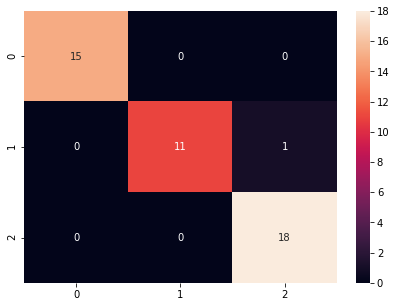


Classification report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.92      0.96        12
 Iris-virginica       0.95      1.00      0.97        18

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,y_test))
# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, prediction)
f, ax = plt.subplots(figsize=(7,5))
sns.heatmap(cm, annot=True,ax=ax)
plt.show()
# classification report
print('\nClassification report:')
cr = classification_report(y_test,prediction)
print(cr)